<a href="https://colab.research.google.com/github/prexia/proyecto-2/blob/main/Proyecto_2_Clasificadores_Bravo_Moreno_Santiago_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Modelo: Logistic Regression
Precisión: 0.9533
Puntaje F1: 0.9391


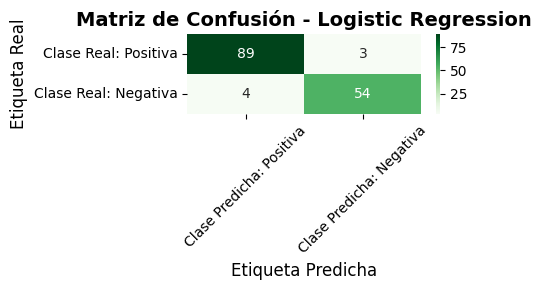


Modelo: k-Nearest Neighbors
Precisión: 0.9267
Puntaje F1: 0.8991


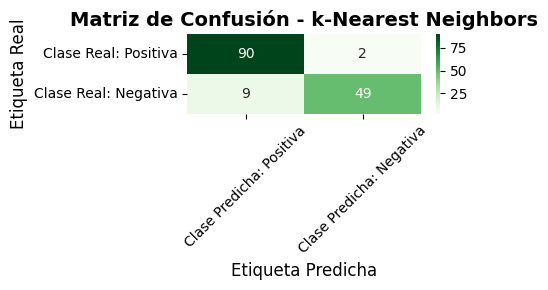


Modelo: Support Vector Machine
Precisión: 0.9067
Puntaje F1: 0.8654


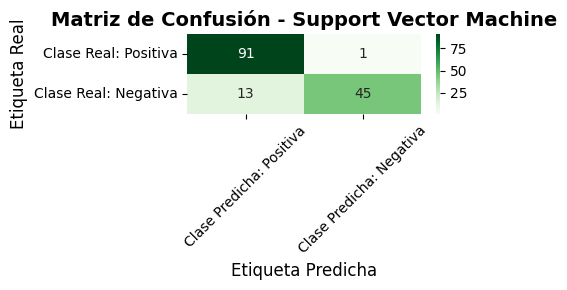


Modelo: Decision Tree
Precisión: 0.9267
Puntaje F1: 0.9060


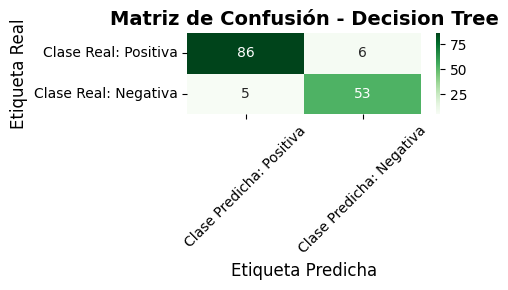


Modelo: Random Forest
Precisión: 0.9533
Puntaje F1: 0.9381


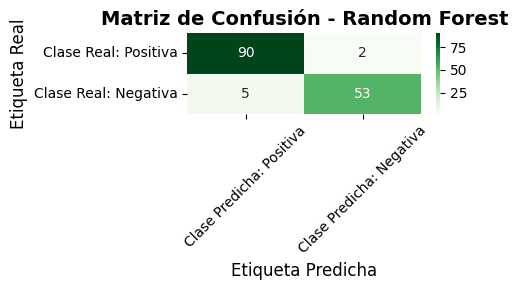

In [9]:
# 1. Importar bibliotecas necesarias
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Función para cargar y preprocesar los datos
def cargar_datos(ruta_archivo):

    try:
        # Cargar los datos
        data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cancer.csv")

        # Eliminar columna irrelevante
        if 'id' in data.columns:
            data = data.drop(columns=['id'])

        # Codificar etiquetas (M=1, B=0)
        data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

        # Separar características (X) y etiquetas (y)
        X = data.drop(columns=['diagnosis'])
        y = data['diagnosis']

        #Devuelve X, y con las caracteristicas en el formato que necesitamos
        return X, y
    except Exception as e:
        print(f"Error al cargar los datos: {e}")
        return None, None

#Función para dividir los datos
def dividir_datos(X, y):


    #Devuelve X_train, X_test, y_train, y_test: conjuntos divididos.
    return train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#Función para inicializar modelos
def inicializar_modelos():

    #Devuelve un diccionario con los modelos inicializados.
    return {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'k-Nearest Neighbors': KNeighborsClassifier(),
        'Support Vector Machine': SVC(probability=True, random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42)
    }

#Función para entrenar y evaluar modelos
def entrenar_evaluar_modelos(modelos, X_train, X_test, y_train, y_test):

    resultados = {}
    for nombre, modelo in modelos.items():
        try:
            #Entrenamiento
            modelo.fit(X_train, y_train)
            # Predicciones
            y_pred = modelo.predict(X_test)
            #Métricas
            resultados[nombre] = {
                'Accuracy': accuracy_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
                'Confusion Matrix': confusion_matrix(y_test, y_pred)
            }
        except Exception as e:
            print(f"Error al entrenar o evaluar {nombre}: {e}")
    return resultados

#Función para graficar matriz de confusión
def graficar_matriz_confusion(matriz, titulo):

    plt.figure(figsize=(5, 3))
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Greens', xticklabels=['Clase Predicha: Positiva', 'Clase Predicha: Negativa'], yticklabels=['Clase Real: Positiva', 'Clase Real: Negativa'])
    plt.title(f'Matriz de Confusión - {titulo}', fontsize=14, fontweight='bold')
    plt.xlabel('Etiqueta Predicha', fontsize=12)
    plt.ylabel('Etiqueta Real', fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

#Bloque principal
if __name__ == "__main__":
    #Ruta del archivo desde Google Drive
    ruta_archivo = "/content/drive/MyDrive/Colab Notebooks/Cancer.csv"

    #Cargar datos
    X, y = cargar_datos(ruta_archivo)
    if X is not None and y is not None:
        #Dividir datos
        X_train, X_test, y_train, y_test = dividir_datos(X, y)
        #Inicializar modelos
        modelos = inicializar_modelos()
        #Entrenar y evaluar
        resultados = entrenar_evaluar_modelos(modelos, X_train, X_test, y_train, y_test)
        #Mostrar resultados
        for nombre, metricas in resultados.items():
            print(f"\nModelo: {nombre}")
            print(f"Precisión: {metricas['Accuracy']:.4f}")
            print(f"Puntaje F1: {metricas['F1 Score']:.4f}")
            graficar_matriz_confusion(metricas['Confusion Matrix'], titulo=nombre)
